# About the project
Fraud occurs in the financial sector and using machine learning we will try and train a model to identify such fraud attempts or anything that's out of the norm of a regular transaction.

There are many ways fraud can occur by,

1. Pickpocketing or physical theft
2. Skimming card infromation
3. Phishing and other scams
4. Carding or cyber attacks

Most of the fraudulent transactions that occur have some strange or out-of-norm details and some are like,

1. Purchases that you have no recollection of
2. Miscellaneous charges that don't trigger any red flags and often pass off as banking fees
3. Unfamiliar names and entities on your statements
4. Payments done in loactions you have never been to or not been there when the transaction happened
5. Lower than expected credit balance
6. Numbers simply don't add up...

among many others.

In this project we'll be using specific algorithms that detect anomalies like,

1. IsolationForest
2. LocalOultlierFactor

and other models like,

3. LogisticRegression
4. Nueral Networks
5. RandomForestClassifier
6. GradientBoostingClassifier
7. LinearSVC

We will be using metrics suchs as precision, recall, and F1-scores, we will investigate why the classification accuracy for these algorithms can be misleading.

We will also explore the use of data visualization techniques common in data science, such as parameter histograms and correlation matrices, to gain a better understanding of the underlying distribution of data in our data set and also attempt resampling the dataset such that the input data is not extremely skewed.

# About the dataset
This project will be using the [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) dataset.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data cannot be provided. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

The feature 'Time' contains the seconds elapsed between a transaction and the first transaction in the dataset. 

The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
RANDOM_SEED = 108
LABELS = ["Valid", "Fraud"]

### Load the dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Exploring the data

In [4]:
df.isnull().values.any()

False

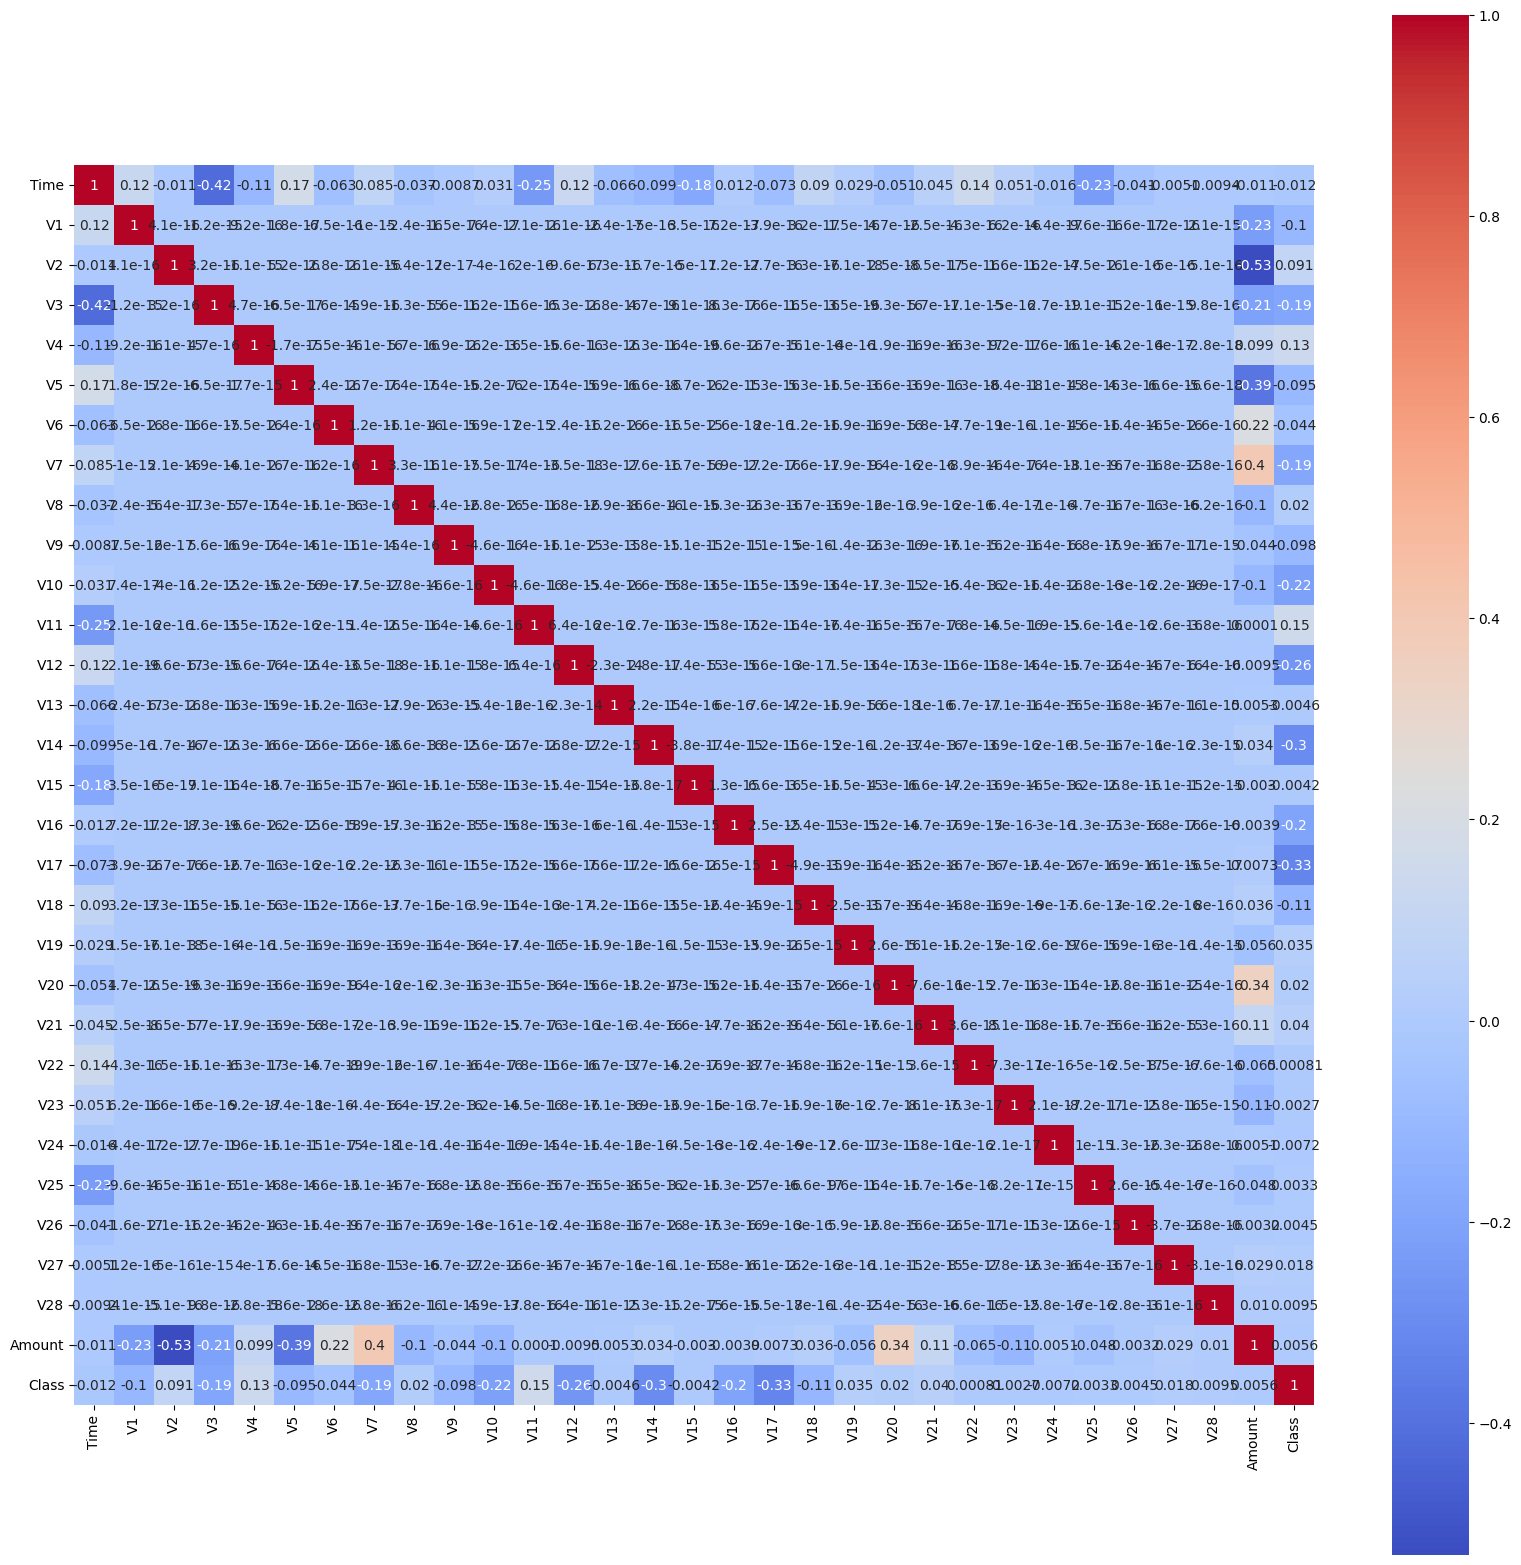

In [5]:
# Checking for any correlations between the features
corrmat = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', square=True);
plt.show()

Every feature in the correlation heatmap seem to be independent of each other.

Looking at the `Class` feature, it seems to have zero correlation with majority of the features with a few negative correlations as well. And this result is expected with features that are a result of a good PCA.

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


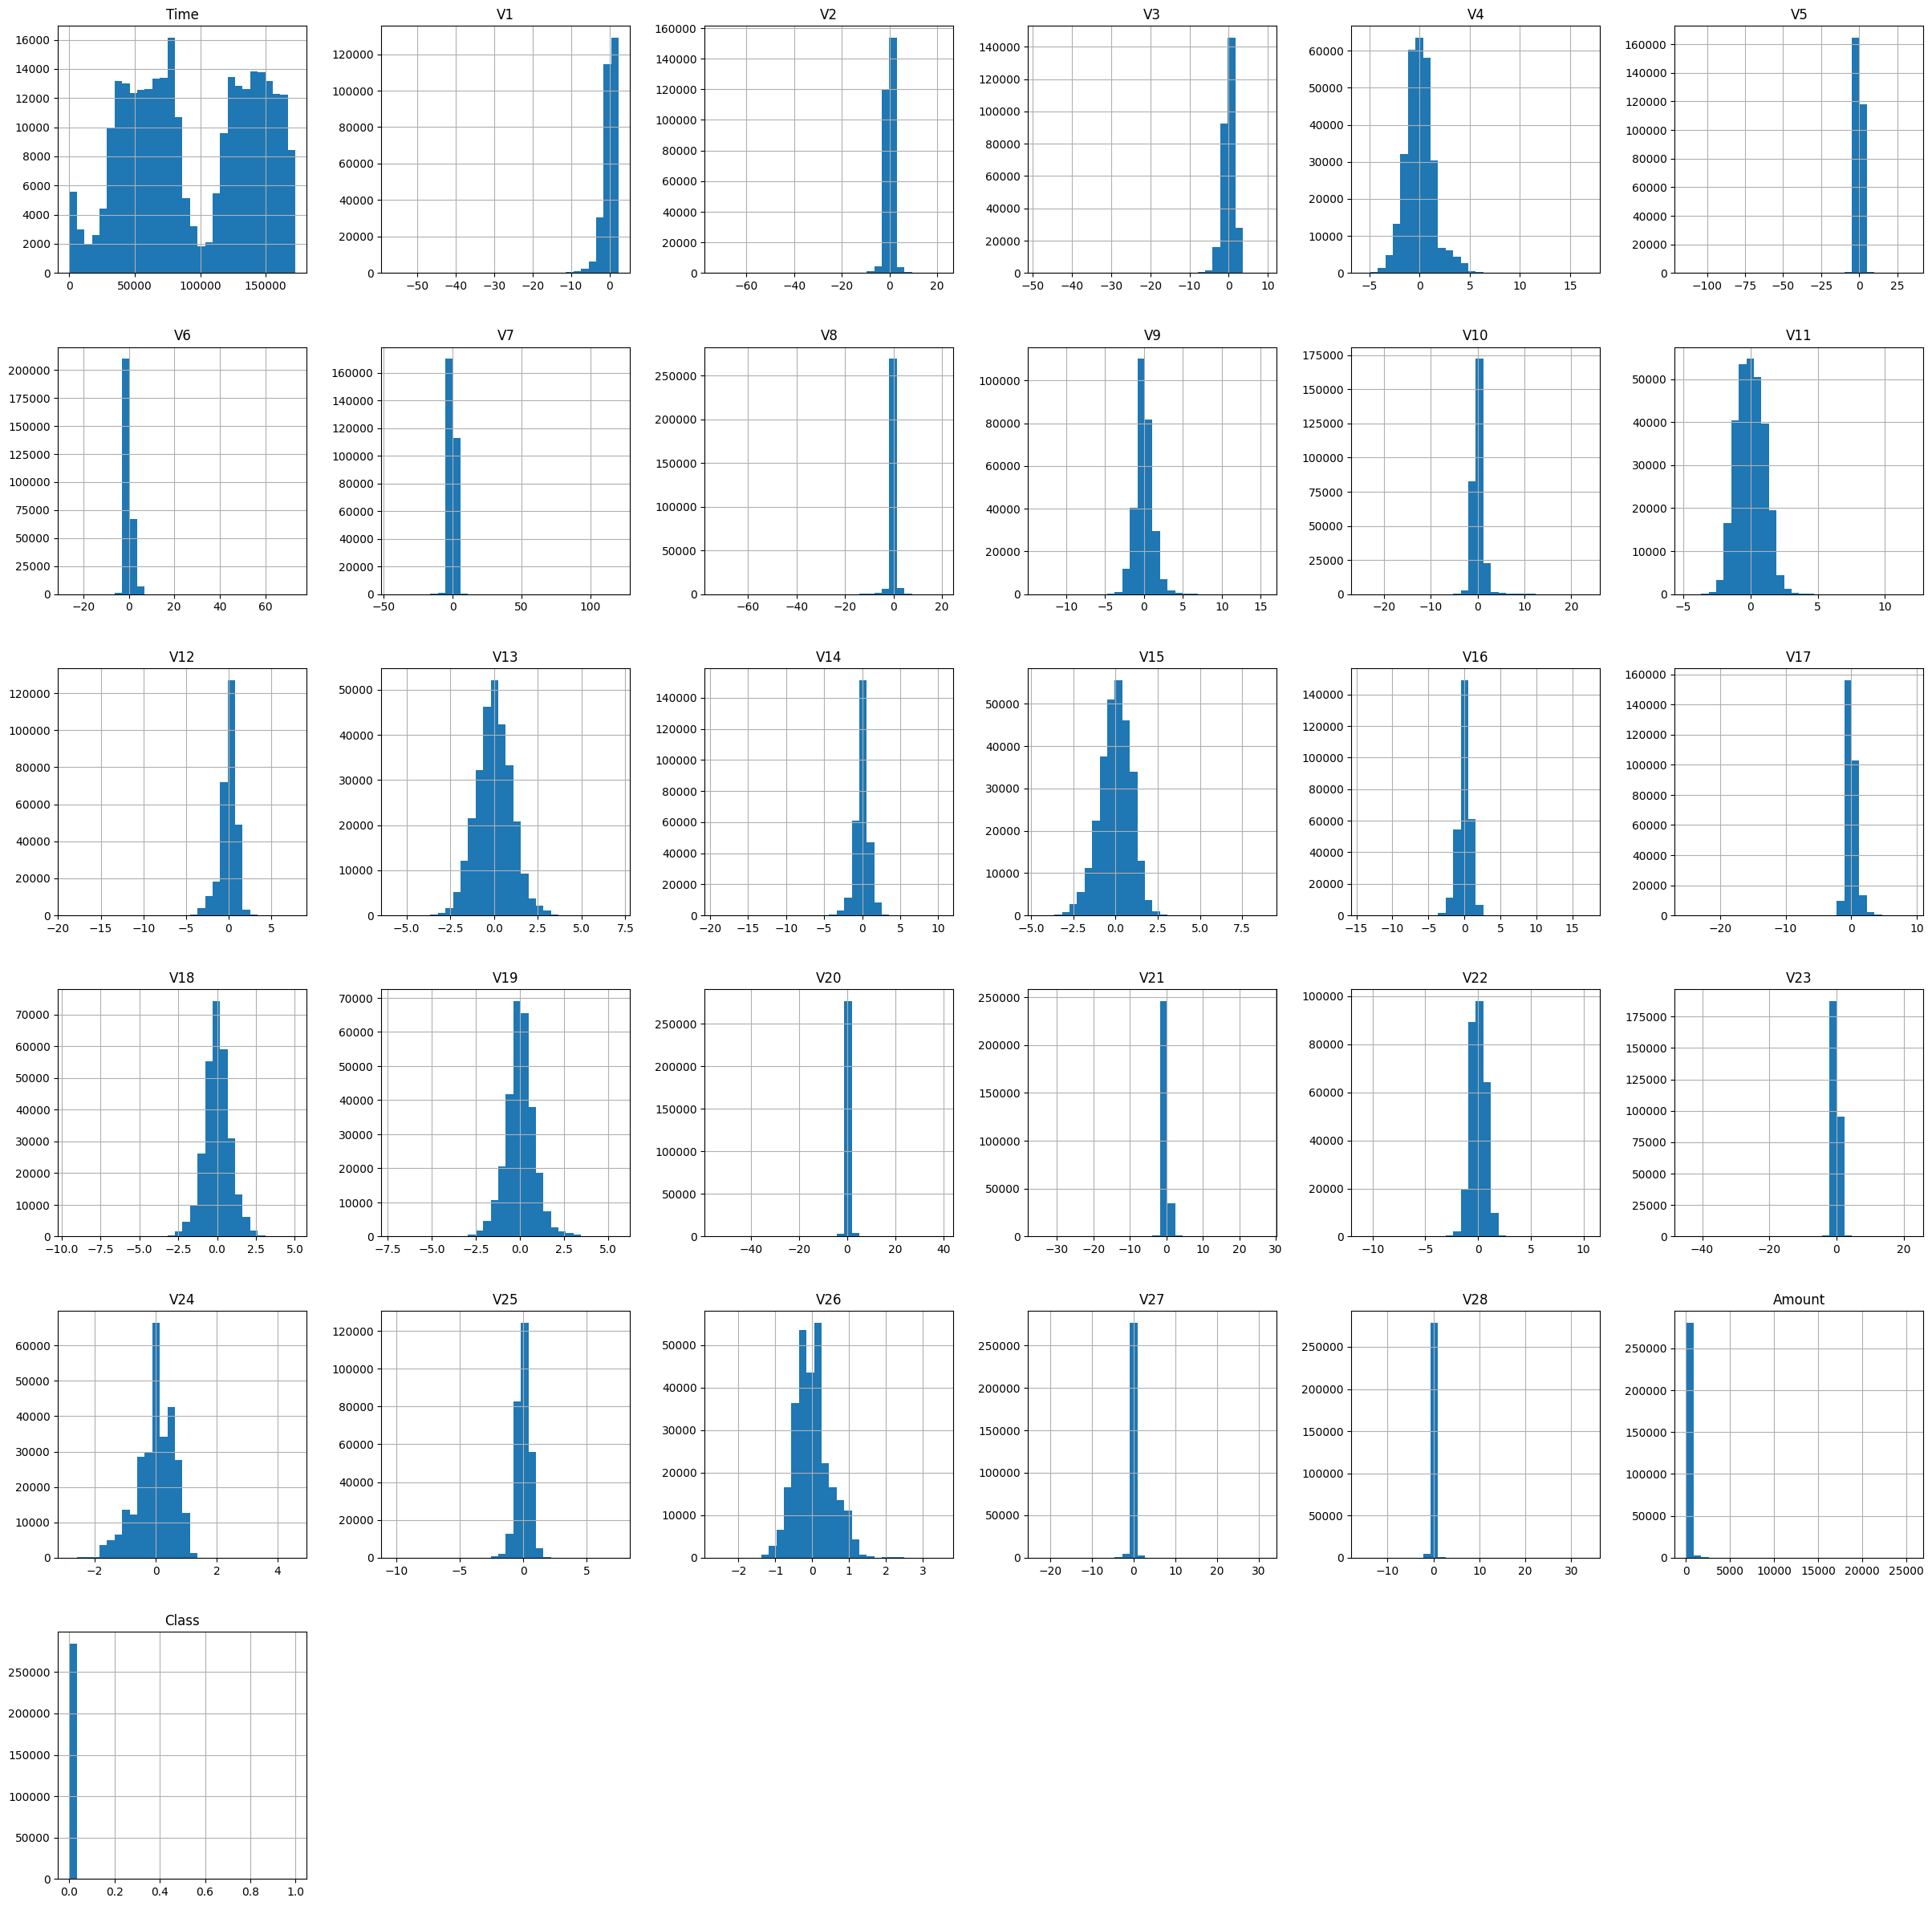

In [7]:
df.hist(bins=30, figsize=(30, 30));

Looking at the graphs and the means and standard deviations of the describe method you will see that `Time` and `Amount` have an absurdly large mean and std deviation compared to the rest of the columns. So now we can try and scale the values in these to columns so that better learning can take place.

In [8]:
df[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


Looking at the `Class` column, the mean is too close to zero. This means that there are far more valid transactions than the fraudulent ones.

In [9]:
df_fraud = df[df['Class']==1]
df_valid = df[df['Class']==0]

outlier_fraction = len(df_fraud)/float(len(df_valid))

print(f"#Valid = {len(df_valid)}\n#Frauds = {len(df_fraud)}\nOutlier% = {outlier_fraction*100}")

#Valid = 284315
#Frauds = 492
Outlier% = 0.17304750013189596


Only 0.173% are fraudulent cases, making it harder to predict actual frauds. So what we can do is create a dataframe with a fraction of the valids and the whole of frauds such that the number of cases are comparable.

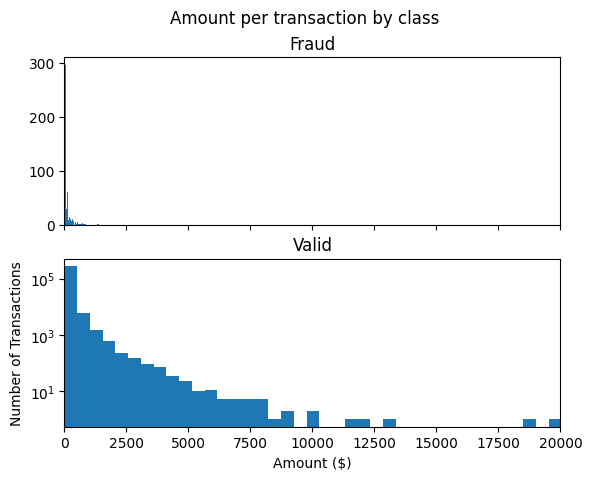

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(df_fraud['Amount'], bins = bins)
ax1.set_title('Fraud')
ax2.hist(df_valid['Amount'], bins = bins)
ax2.set_title('Valid')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

This seems to be a classic case of fraud by amounts small, small enough that it does not raise any red flags.

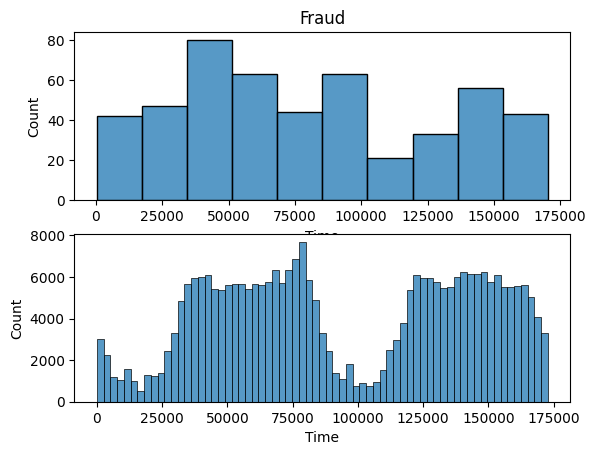

In [11]:
plt.subplot(2,1,1)
sns.histplot(df_fraud.Time)
plt.title("Fraud")

plt.subplot(2,1,2)
sns.histplot(df_valid.Time)
plt.show();

As we can see there is nothing much we can tell from looking at the timing of transactions excpet you could argue that fraudulent transactions are more uniformly distributed, while normal transactions have a some repetition through the day. This could make it easier to detect a fraudulent transaction during at a time where transactions are low.

# Data preprocessing

### Unscaled data

In [12]:
df_x = df.iloc[:,0:30]
df_y = df.iloc[:,-1]
df_x.shape, df_y.shape

((284807, 30), (284807,))

### Scaling the data

In [13]:
from sklearn.preprocessing import RobustScaler
df_scaled = df.copy()
df_scaled['Amount'] = RobustScaler().fit_transform(df_scaled['Amount'].to_numpy().reshape(-1, 1))
time = df_scaled['Time']
df_scaled['Time'] = (time - time.min()) / (time.max() - time.min())
df_scaled.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,0.548717,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.927124,0.001727
std,0.274828,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,3.495006,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-0.307413,0.000000
25%,0.313681,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-0.229162,0.000000
50%,0.490138,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,0.000000
75%,0.806290,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.770838,0.000000
max,1.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,358.683155,1.000000


In [14]:
df_fraud = df_scaled[df_scaled['Class']==1]
df_valid = df_scaled[df_scaled['Class']==0]
df_valid.shape, df_fraud.shape

((284315, 31), (492, 31))

### Splitting the dataset

In [15]:
df_scaled = df_scaled.sample(frac=1, random_state=RANDOM_SEED) #randomize the observations
train, test, val = df_scaled[:170884], df_scaled[170884:227846], df_scaled[227846:] #60% training, 20% test and val each
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(Class
 0    170609
 1       275
 Name: count, dtype: int64,
 Class
 0    56858
 1      104
 Name: count, dtype: int64,
 Class
 0    56848
 1      113
 Name: count, dtype: int64)

### Splitting into input and output data

In [16]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((170884, 30), (170884,), (56962, 30), (56962,), (56961, 30), (56961,))

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def model_performance(model_name, y_actual, y_pred):
    print("\n",model_name)
    print("accuracy score: ",accuracy_score(y_actual, y_pred))
    print("classification report: \n",classification_report(y_actual, y_pred, target_names=LABELS)) 
    print("confusion matrix:\n",confusion_matrix(y_actual, y_pred))

By definition a confusion matrix $C$ is such that $C_{{{i,j}}}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$.

Thus in binary classification, the count of true negatives $C_{{{0,0}}}$, false negatives is $C_{{{1,0}}}$, true positives is $C_{{{1,1}}}$ and false positives is $C_{{{0,1}}}$.

<img src="confusion matrix.jpg" width="520">

Small guide to what a false positive and a false negative means.

<img src="guide for false +- terms.jpg" width="520">

# The models

### LocalOutlierFactor
1. The LocalOutlierFactor is an unsupervised method that calculates an anomaly score for each sample called the local outlier factor. 
2. This score is based on the local density deviation of given sample with respect to the neighbours, or how isolated it is from the neighbours.
3. The local density deviation for an outlier is extremely low compared to observations that are grouped together.
4. The number of neighbors considered, (parameter n_neighbors) is typically chosen,

        1. Greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster. 
        2. Smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.
5. This method internally uses KNN to find the densities of the KNN of an outlier. If the nieghbours have a substantially higher density than he observation at hand, this observation can be flagged as an outlier.

In [18]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski', p=2, metric_params=None, contamination=outlier_fraction)
y_pred = lof.fit_predict(df_x)
scores_prediction = lof.negative_outlier_factor_
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
model_performance("LocalOutlierFactor", df_y, y_pred)


 LocalOutlierFactor
accuracy score:  0.9967170750718908
classification report: 
               precision    recall  f1-score   support

       Valid       1.00      1.00      1.00    284315
       Fraud       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807

confusion matrix:
 [[283847    468]
 [   467     25]]


### IsolationForest
1. The IsolationForest isolates an observation by randomly selecting a feature and randomly selecting a split value between the max and min of the selected feature.
2. The number of splits required to isolate the observation is equal to the path length from the root to leaf.
3. Randomly choosing splits for each of the trees in the forest produce a noticably shorter path for anomalies. 
4. So if many trees collectively produce a shorter path or lesser number of conditional splits for a specific obervation it is more likely to be an anomaly.
5. Why do outliers have a shorter depth of tree? Its because and outlier is not close to any other group of observation and splitting it away from a group is much easier or requires much lesser number of conditions compared to an observation that is in a group hudled together.

In [19]:
from sklearn.ensemble import IsolationForest
isof = IsolationForest(max_samples=len(df), contamination=outlier_fraction, random_state=RANDOM_SEED)
isof.fit(x_train)
scores_prediction = isof.decision_function(x_train)
y_pred = isof.predict(x_val)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
model_performance("IsolationForest", y_val, y_pred)

c:\Users\Dhasharadh Reddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_iforest.py:307: UserWarning: max_samples (284807) is greater than the total number of samples (170884). max_samples will be set to n_samples for estimation.
  warn(



 IsolationForest
accuracy score:  0.9973841751373747
classification report: 
               precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     56848
       Fraud       0.33      0.30      0.31       113

    accuracy                           1.00     56961
   macro avg       0.66      0.65      0.66     56961
weighted avg       1.00      1.00      1.00     56961

confusion matrix:
 [[56778    70]
 [   79    34]]


As we can see from the above analysis, the IsolationForest seems to perform better compared to the LocalOutlierFactor because:
1. It employs ensemble learning.
2. The process in IsolationForest is randomized.
3. The number of neighours considered in this case may not be the most optimal value, and in general not very performative unless you have a crazy level of understanding of the dataset at hand upon which you can make appropriate adjustments to the model.

Even then the recall and precision of the IsolationForest is rather low and that is because we are using a highly unbalanced dataset. The model is good but it must do a better job in detecting frauds (higher recall) and allowing legit transactions (precision), and the f1 score is the overall harmonic mean of the two and higher the f1 score better the result.

Support score is like the number of observations that hold up the claims made by the precision, recall and f1 scores on the model's performance.

### LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500)
lr.fit(x_train, y_train)
lr.score(x_train, y_train)
y_pred = lr.predict(x_val)
model_performance("LogisticRegression", y_val, y_pred)


 LogisticRegression
accuracy score:  0.9988939800916417
classification report: 
               precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     56848
       Fraud       0.88      0.51      0.65       113

    accuracy                           1.00     56961
   macro avg       0.94      0.76      0.82     56961
weighted avg       1.00      1.00      1.00     56961

confusion matrix:
 [[56840     8]
 [   55    58]]


Here the model seems to work better and have better precision and recall values individually compared to the other two models. The accuracy mentioned as 1 is approximated and is evident from precision and recall scores. The model is good but it must do a better job in detecting frauds (higher recall) and allowing legit transactions (precision), and the f1 score is the overall harmonic mean of the two and higher the f1 score better the result.

Support score is like the number of observations that hold up the claims made by the precision, recall and f1 scores on the model's performance.

### Neural Network

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

In [22]:
NN_model = Sequential()
NN_model.add(InputLayer((x_train.shape[1],)))
NN_model.add(Dense(5, 'relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('creditcard_NN_model', save_best_only=True)
NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 155       
                                                                 
 batch_normalization (BatchN  (None, 5)                20        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 171
Non-trainable params: 10
_________________________________________________________________


In [23]:
NN_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=checkpoint, verbose=1)

Epoch 1/5
5335/5341 [============================>.] - ETA: 0s - loss: 0.0503 - accuracy: 0.9878

INFO:tensorflow:Assets written to: creditcard_NN_model\assets


INFO:tensorflow:Assets written to: creditcard_NN_model\assets


5341/5341 [==============================] - 10s 2ms/step - loss: 0.0502 - accuracy: 0.9878 - val_loss: 0.0071 - val_accuracy: 0.9992
Epoch 2/5
5315/5341 [============================>.] - ETA: 0s - loss: 0.0033 - accuracy: 0.9993

INFO:tensorflow:Assets written to: creditcard_NN_model\assets


INFO:tensorflow:Assets written to: creditcard_NN_model\assets


5341/5341 [==============================] - 8s 2ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0068 - val_accuracy: 0.9992
Epoch 3/5
5341/5341 [==============================] - 8s 1ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0074 - val_accuracy: 0.9992
Epoch 4/5
5341/5341 [==============================] - 8s 1ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0074 - val_accuracy: 0.9993
Epoch 5/5
5341/5341 [==============================] - 8s 1ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0077 - val_accuracy: 0.9991


In [24]:
def neural_net_performance(threshold):
  y_pred = (NN_model.predict(x_val).flatten() > threshold).astype(int)
  return accuracy_score(y_val, y_pred)

In [25]:
thresholds = np.array([0.1, 0.3, 0.5, 0.7, 0.9])
accuracies = np.array(list(map(neural_net_performance, thresholds)))
pairs = np.column_stack((thresholds, accuracies))
print("\n",pairs)
max_performing_threshold = 0
for i in pairs:
    if i[1] == np.max(accuracies):
        max_performing_threshold = i[0]
        print("\n",i)

1781/1781 [==============================] - 1s 794us/step

 [[0.1        0.99859553]
 [0.3        0.99905198]
 [0.5        0.99913976]
 [0.7        0.99922754]
 [0.9        0.99922754]]

 [0.7        0.99922754]

 [0.9        0.99922754]


In [26]:
y_pred = (NN_model.predict(x_val).flatten() > max_performing_threshold).astype(int)
model_performance("Neural Network", y_val, y_pred)

1781/1781 [==============================] - 1s 767us/step

 Neural Network
accuracy score:  0.9992275416513052
classification report: 
               precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     56848
       Fraud       0.81      0.81      0.81       113

    accuracy                           1.00     56961
   macro avg       0.90      0.90      0.90     56961
weighted avg       1.00      1.00      1.00     56961

confusion matrix:
 [[56826    22]
 [   22    91]]


This seems to be the best model we've got at hand with a much better and balanced precision and recall scores than the IsolationForest algorithm.

### Other ensemble models
Apart from IsolationForest we can also try other ensemble methods like RandomForestClassifier and GradientBoostingClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=RANDOM_SEED)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_val)
model_performance("RandomForestClassifier", y_val, y_pred)


 RandomForestClassifier
accuracy score:  0.9992977651375503
classification report: 
               precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     56848
       Fraud       0.97      0.66      0.79       113

    accuracy                           1.00     56961
   macro avg       0.99      0.83      0.89     56961
weighted avg       1.00      1.00      1.00     56961

confusion matrix:
 [[56846     2]
 [   38    75]]


The RandomTreeClassifier seems to do a good job in being precise on which transactions are valid but lets away a lot more frauds compared to the NN, but performs well for less number of computations.

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=RANDOM_SEED)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_val)
model_performance("GradientBoostingClassifier", y_val, y_pred)


 GradientBoostingClassifier
accuracy score:  0.9987886448622741
classification report: 
               precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     56848
       Fraud       0.79      0.53      0.63       113

    accuracy                           1.00     56961
   macro avg       0.89      0.77      0.82     56961
weighted avg       1.00      1.00      1.00     56961

confusion matrix:
 [[56832    16]
 [   53    60]]


Lower precision and recall compared to RandomForestClassifier.

### SVC
We can try SVC which is like a laxed regressor.

In [29]:
from sklearn.svm import LinearSVC
svc = LinearSVC(class_weight='balanced')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
model_performance("LinearSVC", y_val, y_pred)


 LinearSVC
accuracy score:  0.9991748740366215
classification report: 
               precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     56848
       Fraud       0.81      0.77      0.79       113

    accuracy                           1.00     56961
   macro avg       0.90      0.88      0.89     56961
weighted avg       1.00      1.00      1.00     56961

confusion matrix:
 [[56827    21]
 [   26    87]]


c:\Users\Dhasharadh Reddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


On par with the neural network.

Now testing all the models used till now with the test data.

In [30]:
classifiers = {
    "Local Outlier Factor" : lof,
    "Isolation Forest" : isof,
    "Logistic Regression" : lr,
    "Neural Net" : NN_model,
    "Random Forest Classifier" : rf,
    "Gradient Boosting Classifier" : gbc,
    "Linear SVC" : svc
}

In [31]:
for i, (clf_name,clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x_test)
        # The y_pred values are -1 for outliers and 1 for inliers in the case of Local Outliers Factor and . But our class labels are 1 for outliers and 0 for inliers
        y_pred[y_pred == 1] = 0
        y_pred[y_pred == -1] = 1
    elif clf_name == "Isolation Forest":    
        y_pred = clf.predict(x_test)
        # The y_pred values are -1 for outliers and 1 for inliers in the case of Local Outliers Factor and . But our class labels are 1 for outliers and 0 for inliers
        y_pred[y_pred == 1] = 0
        y_pred[y_pred == -1] = 1
    elif clf_name == "Logistic Regression":
        y_pred = clf.predict(x_test)
    elif clf_name == "Neural Net":
        y_pred = (clf.predict(x_test, verbose=0).flatten() > 0.9).astype(int)
    elif clf_name == "Random Forest Classifier":
        y_pred = clf.predict(x_test)
    elif clf_name == "Gradient Boosting Classifier":
        y_pred = clf.predict(x_test)
    elif clf_name == "Linear SVC":
        y_pred = clf.predict(x_test)
    
    model_performance(clf_name, y_test, y_pred)


 Local Outlier Factor
accuracy score:  0.9964713317650363
classification report: 
               precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     56858
       Fraud       0.01      0.01      0.01       104

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

confusion matrix:
 [[56760    98]
 [  103     1]]

 Isolation Forest
accuracy score:  0.9976124433833081
classification report: 
               precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     56858
       Fraud       0.34      0.32      0.33       104

    accuracy                           1.00     56962
   macro avg       0.67      0.66      0.66     56962
weighted avg       1.00      1.00      1.00     56962

confusion matrix:
 [[56793    65]
 [   71    33]]

 Logistic Regression
accuracy score:  0.9990871107053826
classification report: 


The Linear SVC seems to have generalized the best overall and at second comes in the Neural Net which has the highest recall rate among the rest which is very important from a company's perspective and Random Forest Classifier which has the highest precision among all the models which is good for customer satisfaction.

# Resampling the data
We will try undersampling (random) valid transactions from the scikit learn library and try running all the models that we have used so far and conclude.

In [32]:
from sklearn.utils import resample
df_balanced = pd.concat([df_fraud, resample(df_valid, replace=False, n_samples=len(df_fraud), random_state=RANDOM_SEED)])
df_balanced["Class"].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

Now both the valid and fraud transaction have same number of observations. Now shuffling the observations.

In [33]:
df_balanced = df_balanced.sample(frac=1, random_state=RANDOM_SEED)
df_balanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18472,0.170905,-1.060676,2.608579,-2.971679,4.360089,3.738853,-2.728395,1.987616,-0.357345,-2.757535,...,-0.063168,-0.207385,-0.183261,-0.103679,0.896178,0.407387,-0.130918,0.192177,-0.297911,1
135718,0.470925,-0.885254,1.790649,-0.945149,3.853433,-1.543510,0.188582,-2.988383,1.344059,-2.294535,...,0.746160,0.550802,-0.034882,-0.567608,-0.528318,0.258782,0.506893,0.176736,-0.201635,1
111268,0.417641,1.234643,0.341500,0.436500,0.772621,-0.559627,-1.267995,0.069996,-0.205520,0.060868,...,-0.270509,-0.796872,0.174342,0.662305,0.161597,0.075415,-0.024680,0.033271,-0.293579,0
83254,0.345844,-0.641771,1.133514,1.972775,-0.038888,-0.013568,-1.151956,1.137491,-0.609911,0.016058,...,-0.305171,-0.410026,-0.037948,0.916442,-0.255756,-0.028961,-0.079411,-0.255654,-0.181933,0
105031,0.401263,-0.812734,0.856872,1.556301,-0.139185,0.490138,-0.549665,0.632953,0.191489,-0.502267,...,-0.161690,-0.583649,-0.234013,-0.088860,0.601242,-0.607999,0.193247,0.027864,-0.266331,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183106,0.727221,0.224414,2.994499,-3.432458,3.986519,3.760233,0.165640,1.099378,-0.654557,-2.435416,...,0.491337,-0.984223,-0.421979,-1.048058,0.726412,0.268625,0.283689,0.419102,-0.307413,1
251477,0.899110,-1.067713,5.262312,-8.438567,7.316487,0.008254,-2.125936,-3.307036,1.869838,-4.522584,...,0.547790,-0.491960,0.055914,-1.145369,0.068951,0.535055,0.539263,0.124255,-0.296653,1
46998,0.249016,-1.109646,0.811069,-1.138135,0.935265,-2.330248,-0.116106,-1.621986,0.458028,-0.912189,...,0.641594,0.841755,0.176728,0.081004,-0.258899,0.707654,0.418649,0.080756,2.546915,1
274263,0.960253,-0.755544,1.147360,-0.410483,0.925530,1.259335,-0.557953,1.094330,-0.017436,-0.607950,...,0.091461,0.641227,0.001989,0.687449,0.104984,-0.433869,0.050542,-0.068836,-0.265633,0


Preprocessing the data as usual to train all the models with this new balanced dataset.

In [34]:
balanced_train, balanced_test, balanced_val = df_balanced[:590], df_balanced[590:787], df_balanced[787:] #60% balanced_training, 20% balanced_test and balanced_val each
print(balanced_train['Class'].value_counts(),"\n", balanced_test['Class'].value_counts(),"\n", balanced_val['Class'].value_counts(),"\n")

balanced_train_np, balanced_test_np, balanced_val_np = balanced_train.to_numpy(), balanced_test.to_numpy(), balanced_val.to_numpy()
balanced_x_train, balanced_y_train = balanced_train_np[:, :-1], balanced_train_np[:, -1].astype(int)
balanced_x_test, balanced_y_test = balanced_test_np[:, :-1], balanced_test_np[:, -1].astype(int)
balanced_x_val, balanced_y_val = balanced_val_np[:, :-1], balanced_val_np[:, -1].astype(int)
balanced_x_train.shape, balanced_y_train.shape, balanced_x_test.shape, balanced_y_test.shape, balanced_x_val.shape, balanced_y_val.shape

Class
0    307
1    283
Name: count, dtype: int64 
 Class
1    99
0    98
Name: count, dtype: int64 
 Class
1    110
0     87
Name: count, dtype: int64 



((590, 30), (590,), (197, 30), (197,), (197, 30), (197,))

Now lets train all the models with this balanced dataset.

In [35]:
balanced_lof = LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski', p=2, metric_params=None)
balanced_isof = IsolationForest(max_samples=len(df_balanced), random_state=RANDOM_SEED)
balanced_lr = LogisticRegression(max_iter=500)
balanced_rf = RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=RANDOM_SEED)
balanced_gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=RANDOM_SEED)
balanced_svc = LinearSVC(class_weight='balanced')

In [36]:
balanced_NN_model = Sequential()
balanced_NN_model.add(InputLayer((x_train.shape[1],)))
balanced_NN_model.add(Dense(5, 'relu'))
balanced_NN_model.add(BatchNormalization())
balanced_NN_model.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('balanced_creditcard_NN_model', save_best_only=True)
balanced_NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
balanced_NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 155       
                                                                 
 batch_normalization_1 (Batc  (None, 5)                20        
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 171
Non-trainable params: 10
_________________________________________________________________


In [37]:
def neural_net_performance(threshold):
  y_pred = (balanced_NN_model.predict(x_val).flatten() > threshold).astype(int)
  return accuracy_score(y_val, y_pred)

def best_NN_performance(x):
    thresholds = np.array([0.1, 0.3, 0.5, 0.7, 0.9])
    accuracies = np.array(list(map(neural_net_performance, thresholds)))
    pairs = np.column_stack((thresholds, accuracies))
    print("\n",pairs)
    max_performing_threshold = 0
    for i in pairs:
        if i[1] == np.max(accuracies):
            max_performing_threshold = i[0]
    y_pred = (NN_model.predict(x, verbose=0).flatten() > max_performing_threshold).astype(int)
    return y_pred

In [38]:
classifiers = {
    "Local Outlier Factor" : balanced_lof,
    "Isolation Forest" : balanced_isof,
    "Logistic Regression" : balanced_lr,
    "Neural Net" : balanced_NN_model,
    "Random Forest Classifier" : balanced_rf,
    "Gradient Boosting Classifier" : balanced_gbc,
    "Linear SVC" : balanced_svc
}

In [40]:
for i, (clf_name,clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(balanced_x_train)
        scores_prediction = clf.negative_outlier_factor_
        # The y_pred values are -1 for outliers and 1 for inliers in the case of Local Outliers Factor and . But our class labels are 1 for outliers and 0 for inliers
        y_pred[y_pred == 1] = 0
        y_pred[y_pred == -1] = 1
        
    elif clf_name == "Isolation Forest":    
        clf.fit(balanced_x_train)
        scores_prediction = clf.decision_function(balanced_x_train)
        y_pred = clf.predict(balanced_x_val)
        # The y_pred values are -1 for outliers and 1 for inliers in the case of Local Outliers Factor and . But our class labels are 1 for outliers and 0 for inliers
        y_pred[y_pred == 1] = 0
        y_pred[y_pred == -1] = 1
        
    elif clf_name == "Logistic Regression":
        clf.fit(balanced_x_train, balanced_y_train)
        clf.score(balanced_x_train, balanced_y_train)
        y_pred = clf.predict(balanced_x_val)
        
    elif clf_name == "Neural Net":
        clf.fit(balanced_x_train, balanced_y_train, validation_data=(balanced_x_val, balanced_y_val), epochs=5, callbacks=checkpoint, verbose=0)
        y_pred = best_NN_performance(balanced_x_val)
        
    elif clf_name == "Random Forest Classifier":
        clf.fit(balanced_x_train, balanced_y_train)
        y_pred = clf.predict(balanced_x_val)
        
    elif clf_name == "Gradient Boosting Classifier":
        clf.fit(balanced_x_train, balanced_y_train)
        y_pred = clf.predict(balanced_x_val)
        
    elif clf_name == "Linear SVC":
        clf.fit(balanced_x_train, balanced_y_train)
        y_pred = clf.predict(balanced_x_val)
    
    if clf_name != "Local Outlier Factor":
        model_performance(clf_name, balanced_y_val, y_pred)
    else:
        model_performance(clf_name, balanced_y_train, y_pred)


 Local Outlier Factor
accuracy score:  0.5338983050847458
classification report: 
               precision    recall  f1-score   support

       Valid       0.53      0.95      0.68       307
       Fraud       0.61      0.08      0.14       283

    accuracy                           0.53       590
   macro avg       0.57      0.52      0.41       590
weighted avg       0.57      0.53      0.42       590

confusion matrix:
 [[292  15]
 [260  23]]


c:\Users\Dhasharadh Reddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_iforest.py:307: UserWarning: max_samples (984) is greater than the total number of samples (590). max_samples will be set to n_samples for estimation.
  warn(



 Isolation Forest
accuracy score:  0.5177664974619289
classification report: 
               precision    recall  f1-score   support

       Valid       0.48      0.99      0.64        87
       Fraud       0.94      0.15      0.25       110

    accuracy                           0.52       197
   macro avg       0.71      0.57      0.45       197
weighted avg       0.74      0.52      0.43       197

confusion matrix:
 [[86  1]
 [94 16]]

 Logistic Regression
accuracy score:  0.9543147208121827
classification report: 
               precision    recall  f1-score   support

       Valid       0.91      0.99      0.95        87
       Fraud       0.99      0.93      0.96       110

    accuracy                           0.95       197
   macro avg       0.95      0.96      0.95       197
weighted avg       0.96      0.95      0.95       197

confusion matrix:
 [[ 86   1]
 [  8 102]]


INFO:tensorflow:Assets written to: balanced_creditcard_NN_model\assets


INFO:tensorflow:Assets written to: balanced_creditcard_NN_model\assets


INFO:tensorflow:Assets written to: balanced_creditcard_NN_model\assets


INFO:tensorflow:Assets written to: balanced_creditcard_NN_model\assets


INFO:tensorflow:Assets written to: balanced_creditcard_NN_model\assets


INFO:tensorflow:Assets written to: balanced_creditcard_NN_model\assets


INFO:tensorflow:Assets written to: balanced_creditcard_NN_model\assets


INFO:tensorflow:Assets written to: balanced_creditcard_NN_model\assets


INFO:tensorflow:Assets written to: balanced_creditcard_NN_model\assets


INFO:tensorflow:Assets written to: balanced_creditcard_NN_model\assets


1781/1781 [==============================] - 1s 706us/step

 [[0.1        0.08899071]
 [0.3        0.41284388]
 [0.5        0.75869455]
 [0.7        0.97856428]
 [0.9        0.99801619]]

 Neural Net
accuracy score:  0.8934010152284264
classification report: 
               precision    recall  f1-score   support

       Valid       0.81      1.00      0.89        87
       Fraud       1.00      0.81      0.89       110

    accuracy                           0.89       197
   macro avg       0.90      0.90      0.89       197
weighted avg       0.91      0.89      0.89       197

confusion matrix:
 [[87  0]
 [21 89]]

 Random Forest Classifier
accuracy score:  0.9289340101522843
classification report: 
               precision    recall  f1-score   support

       Valid       0.87      0.99      0.92        87
       Fraud       0.99      0.88      0.93       110

    accuracy                           0.93       197
   macro avg       0.93      0.94      0.93       197
weighted avg  

c:\Users\Dhasharadh Reddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Clearly the models have much better scores in detecting the frauds but the scores for detecting the valid transactions have reduced as expected but the overall f1 scores look much better compared to the skewed dataset we used earlier.

The Isolation Forest and Local Outlier Factor algorithm trained worse with a asmaller dataset which is obvious as Local Outlier Factor depends on its neighbours (so you will need a lot of them) and Isolation Forest seems to have trouble finding out the outliers maybe because the outliers are more close to the inliers and harder to seperate for that particular train and validation dataset.

The Neural Network trained with average performance, it precisely calls out the frauds.

Logistic Regression, Random Forest Classifier, Gradient Boosting Classifier, and Linear SVC have overall f1 scores of 90% and above with Linear SVC giving the best performance.

Now lets test the models.

In [41]:
for i, (clf_name,clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(balanced_x_test)
        # The y_pred values are -1 for outliers and 1 for inliers in the case of Local Outliers Factor and . But our class labels are 1 for outliers and 0 for inliers
        y_pred[y_pred == 1] = 0
        y_pred[y_pred == -1] = 1
    elif clf_name == "Isolation Forest":    
        y_pred = clf.predict(balanced_x_test)
        # The y_pred values are -1 for outliers and 1 for inliers in the case of Local Outliers Factor and . But our class labels are 1 for outliers and 0 for inliers
        y_pred[y_pred == 1] = 0
        y_pred[y_pred == -1] = 1
    elif clf_name == "Logistic Regression":
        y_pred = clf.predict(balanced_x_test)
    elif clf_name == "Neural Net":
        y_pred = (clf.predict(balanced_x_test, verbose=0).flatten() > max_performing_threshold).astype(int)
    elif clf_name == "Random Forest Classifier":
        y_pred = clf.predict(balanced_x_test)
    elif clf_name == "Gradient Boosting Classifier":
        y_pred = clf.predict(balanced_x_test)
    elif clf_name == "Linear SVC":
        y_pred = clf.predict(balanced_x_test)
    
    model_performance(clf_name, balanced_y_test, y_pred)


 Local Outlier Factor
accuracy score:  0.5329949238578681
classification report: 
               precision    recall  f1-score   support

       Valid       0.52      0.96      0.67        98
       Fraud       0.73      0.11      0.19        99

    accuracy                           0.53       197
   macro avg       0.62      0.54      0.43       197
weighted avg       0.63      0.53      0.43       197

confusion matrix:
 [[94  4]
 [88 11]]

 Isolation Forest
accuracy score:  0.5685279187817259
classification report: 
               precision    recall  f1-score   support

       Valid       0.54      1.00      0.70        98
       Fraud       1.00      0.14      0.25        99

    accuracy                           0.57       197
   macro avg       0.77      0.57      0.47       197
weighted avg       0.77      0.57      0.47       197

confusion matrix:
 [[98  0]
 [85 14]]

 Logistic Regression
accuracy score:  0.949238578680203
classification report: 
               precision 

c:\Users\Dhasharadh Reddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dhasharadh Reddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dhasharadh Reddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

As we can see, the Local Outlier Factor doesn't perform as well as the other models, the Isolation Forest has low f1 scores so not good.

The Neural Net didn't generalize well and its overall f1 scores are average to poor.

The Logistic Regression and Random Forest Classifier are overall best performers of f1 score being 95%, choice among the two can be done based on the priorities of the company, if customer satisfaction is on top you can choose Random Forest Classifier, otherwise the Logistic Regression (though it doesn't really matter).

The Gradient Boosting Classifier and Linear SVC are not far off and they too performed vey well with f1 scores for each class above 90%.

# Oversampling the data
By oversampling the minority class we expect better results compared to the unbalanced dataset. We also expect a better result compared to the random downsampling we did above as we have a lot more data to train on.

In [42]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

### Oversample the data
From imbalance-learn API, we will be using the over_sampling.ADASYN class.

This method is similar to SMOTE but it generates different number of samples depending on an estimate of the local distribution of the class to be oversampled.

In [43]:
from imblearn.over_sampling import ADASYN
# from imblearn.under_sampling import NearMiss
adyn = ADASYN(random_state=RANDOM_SEED, n_neighbors=3)
X_res,Y_res=adyn.fit_resample(X,Y)
X_res.shape,Y_res.shape

((568517, 30), (568517,))

In [44]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284202})


Now that the classes are balanced, we shall now try training and testing the data with this dataset.

In [45]:
df_adasyn = pd.concat([X_res, Y_res], axis=1)
df_adasyn = df_adasyn.sample(frac = 1)
df_adasyn

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
436960,84087.545982,-0.720195,3.016694,-5.388974,4.905932,-2.045209,-1.556308,-5.246577,1.315709,-3.641406,...,0.914301,-0.473047,-0.320337,-0.577681,0.930977,0.749040,1.253745,0.648483,0.431311,1
330940,33676.547028,0.446518,1.619052,-1.913379,3.452703,-0.286084,-0.345574,-1.769003,0.543698,-2.012412,...,0.331333,-0.163187,-0.158289,-0.595644,0.622633,0.103082,0.476795,0.260837,12.000130,1
355163,41637.189362,-6.630549,4.273766,-7.261357,5.084616,-6.106803,-0.529593,-7.742590,1.196961,-3.775869,...,2.149026,0.318527,-0.138153,0.200018,-0.392812,-0.107807,-0.354211,-0.228482,145.578584,1
170873,120391.000000,1.668585,-0.525706,-0.263994,1.325769,-0.627122,-0.147658,-0.389654,0.038207,0.542821,...,0.366917,0.939662,0.030251,0.023449,-0.171231,-0.595922,0.037313,-0.017506,126.500000,0
236377,148783.000000,2.045556,0.123026,-2.075948,0.442692,0.578587,-0.994758,0.381379,-0.299796,0.404128,...,-0.233184,-0.615780,0.191387,0.494497,-0.051309,0.340320,-0.082528,-0.033034,28.330000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218453,141323.000000,1.999982,0.156424,-2.460691,0.237938,1.368012,-0.346331,0.872089,-0.291318,-0.053431,...,0.390489,1.508283,-0.130872,-0.862511,0.616438,0.213747,-0.018140,-0.094889,2.370000,0
464620,100498.322548,-7.107165,5.243121,-4.774642,4.607484,0.697391,-0.200574,-4.652390,-5.199873,-0.017651,...,5.321894,-2.004416,-0.252735,0.121486,0.552367,0.144936,0.257557,1.756011,0.774639,1
68516,53029.000000,-0.749431,1.198522,0.990589,0.055183,-0.504687,-0.852996,0.174543,0.580227,-0.587137,...,-0.170666,-0.687382,0.094994,0.436461,-0.246427,0.049626,0.102554,0.025248,12.980000,0
126125,77940.000000,1.222839,-0.443043,1.017587,-0.634634,-1.496211,-1.045674,-0.662259,0.026793,2.014764,...,-0.007284,0.157672,0.021738,0.696644,0.408473,-0.702022,0.084762,0.035542,1.000000,0


In [46]:
adasyn_train, adasyn_test, adasyn_val = df_adasyn[:341110], df_adasyn[341110:454814], df_adasyn[454814:] #60% X_res_training, 20% X_res_test and X_res_val each
print(adasyn_train['Class'].value_counts(),"\n", adasyn_test['Class'].value_counts(),"\n", adasyn_val['Class'].value_counts(),"\n")

adasyn_train_np, adasyn_test_np, adasyn_val_np = adasyn_train.to_numpy(), adasyn_test.to_numpy(), adasyn_val.to_numpy()
adasyn_X_train, adasyn_Y_train = adasyn_train_np[:, :-1], adasyn_train_np[:, -1].astype(int)
adasyn_X_test, adasyn_Y_test = adasyn_test_np[:, :-1], adasyn_test_np[:, -1].astype(int)
adasyn_X_val, adasyn_Y_val = adasyn_val_np[:, :-1], adasyn_val_np[:, -1].astype(int)

print(adasyn_X_train.shape, adasyn_Y_train.shape, adasyn_X_test.shape, adasyn_Y_test.shape, adasyn_X_val.shape, adasyn_Y_val.shape)

Class
0    170879
1    170231
Name: count, dtype: int64 
 Class
1    57059
0    56645
Name: count, dtype: int64 
 Class
1    56912
0    56791
Name: count, dtype: int64 

(341110, 30) (341110,) (113704, 30) (113704,) (113703, 30) (113703,)


In [47]:
adasyn_lr = LogisticRegression(max_iter=500)
adasyn_rf = RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=RANDOM_SEED)
adasyn_gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=RANDOM_SEED)
adasyn_svc = LinearSVC(class_weight='balanced')

In [48]:
adasyn_nn_model = Sequential()
adasyn_nn_model.add(InputLayer((adasyn_X_train.shape[1],)))
adasyn_nn_model.add(Dense(5, 'relu'))
adasyn_nn_model.add(BatchNormalization())
adasyn_nn_model.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('creditcard_adasyn_nn_model', save_best_only=True)
adasyn_nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
adasyn_nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 155       
                                                                 
 batch_normalization_2 (Batc  (None, 5)                20        
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 171
Non-trainable params: 10
_________________________________________________________________


In [49]:
def neural_net_performance(threshold):
  y_pred = (adasyn_nn_model.predict(adasyn_X_val).flatten() > threshold).astype(int)
  return accuracy_score(adasyn_Y_val, y_pred)

def best_NN_performance(x):
    thresholds = np.array([0.1, 0.3, 0.5, 0.7, 0.9])
    accuracies = np.array(list(map(neural_net_performance, thresholds)))
    pairs = np.column_stack((thresholds, accuracies))
    print("\n",pairs)
    max_performing_threshold = 0
    for i in pairs:
        if i[1] == np.max(accuracies):
            max_performing_threshold = i[0]
    y_pred = (adasyn_nn_model.predict(x, verbose=0).flatten() > max_performing_threshold).astype(int)
    return y_pred

In [50]:
classifiers = {
    "Logistic Regression" : adasyn_lr,
    "Neural Net" : adasyn_nn_model,
    "Random Forest Classifier" : adasyn_rf,
    "Gradient Boosting Classifier" : adasyn_gbc,
    "Linear SVC" : adasyn_svc
}

In [51]:
for i, (clf_name,clf) in enumerate(classifiers.items()):
    if clf_name == "Logistic Regression":
        clf.fit(adasyn_X_train, adasyn_Y_train)
        clf.score(adasyn_X_train, adasyn_Y_train)
        y_pred = clf.predict(adasyn_X_val)
        
    elif clf_name == "Neural Net":
        clf.fit(adasyn_X_train, adasyn_Y_train, validation_data=(adasyn_X_val, adasyn_Y_val), epochs=5, callbacks=checkpoint, verbose=0)
        y_pred = best_NN_performance(adasyn_X_val)
        
    elif clf_name == "Random Forest Classifier":
        clf.fit(adasyn_X_train, adasyn_Y_train)
        y_pred = clf.predict(adasyn_X_val)
        
    elif clf_name == "Gradient Boosting Classifier":
        clf.fit(adasyn_X_train, adasyn_Y_train)
        y_pred = clf.predict(adasyn_X_val)
        
    elif clf_name == "Linear SVC":
        clf.fit(adasyn_X_train, adasyn_Y_train)
        y_pred = clf.predict(adasyn_X_val)
    
    model_performance(clf_name, adasyn_Y_val, y_pred)


 Logistic Regression
accuracy score:  0.9702382522888578
classification report: 
               precision    recall  f1-score   support

       Valid       0.96      0.98      0.97     56791
       Fraud       0.98      0.96      0.97     56912

    accuracy                           0.97    113703
   macro avg       0.97      0.97      0.97    113703
weighted avg       0.97      0.97      0.97    113703

confusion matrix:
 [[55597  1194]
 [ 2190 54722]]


INFO:tensorflow:Assets written to: creditcard_adasyn_nn_model\assets


INFO:tensorflow:Assets written to: creditcard_adasyn_nn_model\assets


INFO:tensorflow:Assets written to: creditcard_adasyn_nn_model\assets


INFO:tensorflow:Assets written to: creditcard_adasyn_nn_model\assets


INFO:tensorflow:Assets written to: creditcard_adasyn_nn_model\assets


INFO:tensorflow:Assets written to: creditcard_adasyn_nn_model\assets


3554/3554 [==============================] - 3s 776us/step

 [[0.1        0.97072197]
 [0.3        0.96132028]
 [0.5        0.95209449]
 [0.7        0.94248173]
 [0.9        0.91783858]]

 Neural Net
accuracy score:  0.970721968637591
classification report: 
               precision    recall  f1-score   support

       Valid       0.96      0.98      0.97     56791
       Fraud       0.98      0.96      0.97     56912

    accuracy                           0.97    113703
   macro avg       0.97      0.97      0.97    113703
weighted avg       0.97      0.97      0.97    113703

confusion matrix:
 [[55476  1315]
 [ 2014 54898]]

 Random Forest Classifier
accuracy score:  0.9666851358363455
classification report: 
               precision    recall  f1-score   support

       Valid       0.94      0.99      0.97     56791
       Fraud       0.99      0.94      0.97     56912

    accuracy                           0.97    113703
   macro avg       0.97      0.97      0.97    113703
wei

c:\Users\Dhasharadh Reddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [41]:
for i, (clf_name,clf) in enumerate(classifiers.items()):
    if clf_name == "Logistic Regression":
        y_pred = clf.predict(adasyn_X_test)
    elif clf_name == "Neural Net":
        y_pred = (clf.predict(adasyn_X_test, verbose=0).flatten() > 0.1).astype(int)
    elif clf_name == "Random Forest Classifier":
        y_pred = clf.predict(adasyn_X_test)
    elif clf_name == "Gradient Boosting Classifier":
        y_pred = clf.predict(adasyn_X_test)
    elif clf_name == "Linear SVC":
        y_pred = clf.predict(adasyn_X_test)
    
    model_performance(clf_name, adasyn_Y_test, y_pred)


 Logistic Regression
accuracy score:  0.9747414338985436
classification report: 
               precision    recall  f1-score   support

       Valid       0.96      0.99      0.98     56920
       Fraud       0.98      0.96      0.97     56784

    accuracy                           0.97    113704
   macro avg       0.97      0.97      0.97    113704
weighted avg       0.97      0.97      0.97    113704

confusion matrix:
 [[56084   836]
 [ 2036 54748]]

 Neural Net
accuracy score:  0.9706078941813833
classification report: 
               precision    recall  f1-score   support

       Valid       0.97      0.98      0.97     56920
       Fraud       0.98      0.96      0.97     56784

    accuracy                           0.97    113704
   macro avg       0.97      0.97      0.97    113704
weighted avg       0.97      0.97      0.97    113704

confusion matrix:
 [[55566  1354]
 [ 1988 54796]]

 Random Forest Classifier
accuracy score:  0.9670020403855625
classification report: 
  

The models trained on the oversampled dataset performed much better than the models trained on downsampled data with all the models, except Linear SVC, have         f1-scores of 97% and above. These models have remarkable and well trained and do well even on testing.

# Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the [DefeatFraud](https://mlg.ulb.ac.be/wordpress/portfolio_page/defeatfraud-assessment-and-validation-of-deep-feature-engineering-and-learning-solutions-for-fraud-detection/) project.

### Citations

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. [Calibrating Probability with Undersampling for Unbalanced Classification](https://www.researchgate.net/publication/283349138_Calibrating_Probability_with_Undersampling_for_Unbalanced_Classification). In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. [Learned lessons in credit card fraud detection from a practitioner perspective](https://www.researchgate.net/publication/260837261_Learned_lessons_in_credit_card_fraud_detection_from_a_practitioner_perspective), Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. [Credit card fraud detection: a realistic modeling and a novel learning strategy](https://www.researchgate.net/publication/319867396_Credit_Card_Fraud_Detection_A_Realistic_Modeling_and_a_Novel_Learning_Strategy), IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea [Adaptive Machine learning for credit card fraud detection](https://di.ulb.ac.be/map/adalpozz/pdf/Dalpozzolo2015PhD.pdf) ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. [Scarff: a scalable framework for streaming credit card fraud detection with Spark](https://www.researchgate.net/publication/319616537_SCARFF_a_Scalable_Framework_for_Streaming_Credit_Card_Fraud_Detection_with_Spark), Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. [Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization](https://www.researchgate.net/publication/324615588_Streaming_Active_Learning_Strategies_for_Real-Life_Credit_Card_Fraud_Detection_Assessment_and_Visualization), International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi [Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection](https://www.researchgate.net/publication/332180999_Deep-Learning_Domain_Adaptation_Techniques_for_Credit_Cards_Fraud_Detection), INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi [Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection](https://www.researchgate.net/publication/333143698_Combining_Unsupervised_and_Supervised_Learning_in_Credit_Card_Fraud_Detection) Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi [Reproducible machine Learning for Credit Card Fraud Detection](https://www.researchgate.net/publication/351283764_Reproducible_Machine_Learning_for_Credit_Card_Fraud_Detection_-_Practical_Handbook) - Practical Handbook

Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi [Incremental learning strategies for credit cards fraud detection](https://www.researchgate.net/publication/332180999_Deep-Learning_Domain_Adaptation_Techniques_for_Credit_Cards_Fraud_Detection), International Journal of Data Science and Analytics